# FashionMNIST Challenge 之 K-Means算法實現

## 一、算法原理

    基於聚類中心的算法中,我們最熟悉的莫過於 K-Means 啦.
    K-Menas計算過程:
> 
> 1. 初始化k個點作為聚類中心,這個初始化的過程我們可以選擇是隨機生成(當然,下面的TSNE函數調用的時候就是採用了隨機值的方法,只是默認的.當然你也可以選擇使用其他的方法,例如先用PCA的方式進行初始化,這樣對於大數據來說是一個不錯的方案,因為這能降低很大的計算成本),當然我也在此函數調用中嘗試了很多其他的方案,利用也使用了PCA的方法,但是對於這個數據集並沒有很明顯的效果,對便值得一提的是,對於初選點雖然不是很重要的,但是如果選區的方法得當,這將能給你帶來很大的好處,而且方法也有很多.
> 
> 2. 重新計算每個類別的聚類中心,並替換掉原有的中心(不然計算新的幹什麼)
> 3. 持續迭代,直到不再產生明顯的變動或者達到閥值

    順便值得一提的是,這裡選擇的k個聚類中心點點個數並不一定要等於總類別數,當然用這個算法的很大一部分就是不知道其類別數.
    舉個例子
<img src="http://img.blog.csdn.net/20150905133443993">


## 二、算法實現
### 1. 设计并训练K-Means算法对图片进行聚类

In [ ]:
# 二維數據聚類並繪圖
import numpy as np
import matplotlib.pyplot as plt
% matplotlib notebook
from sklearn.manifold import TSNE
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets('./data/', one_hot=True)
X_embedded = TSNE(n_components=2).fit_transform(mnist.train.next_batch(55000)[0]) # TSNE 聚類算法
# print(X_embedded)
x=[];y=[]
for a,b in X_embedded:
    x.append(a)
    y.append(b)
plt.scatter(x,y)
plt.show()

Extracting ./data/train-images-idx3-ubyte.gz
Extracting ./data/train-labels-idx1-ubyte.gz
Extracting ./data/t10k-images-idx3-ubyte.gz
Extracting ./data/t10k-labels-idx1-ubyte.gz



Bad key "ckend" on line 1 in
/Users/tudoudou/.matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


<IPython.core.display.Javascript object>


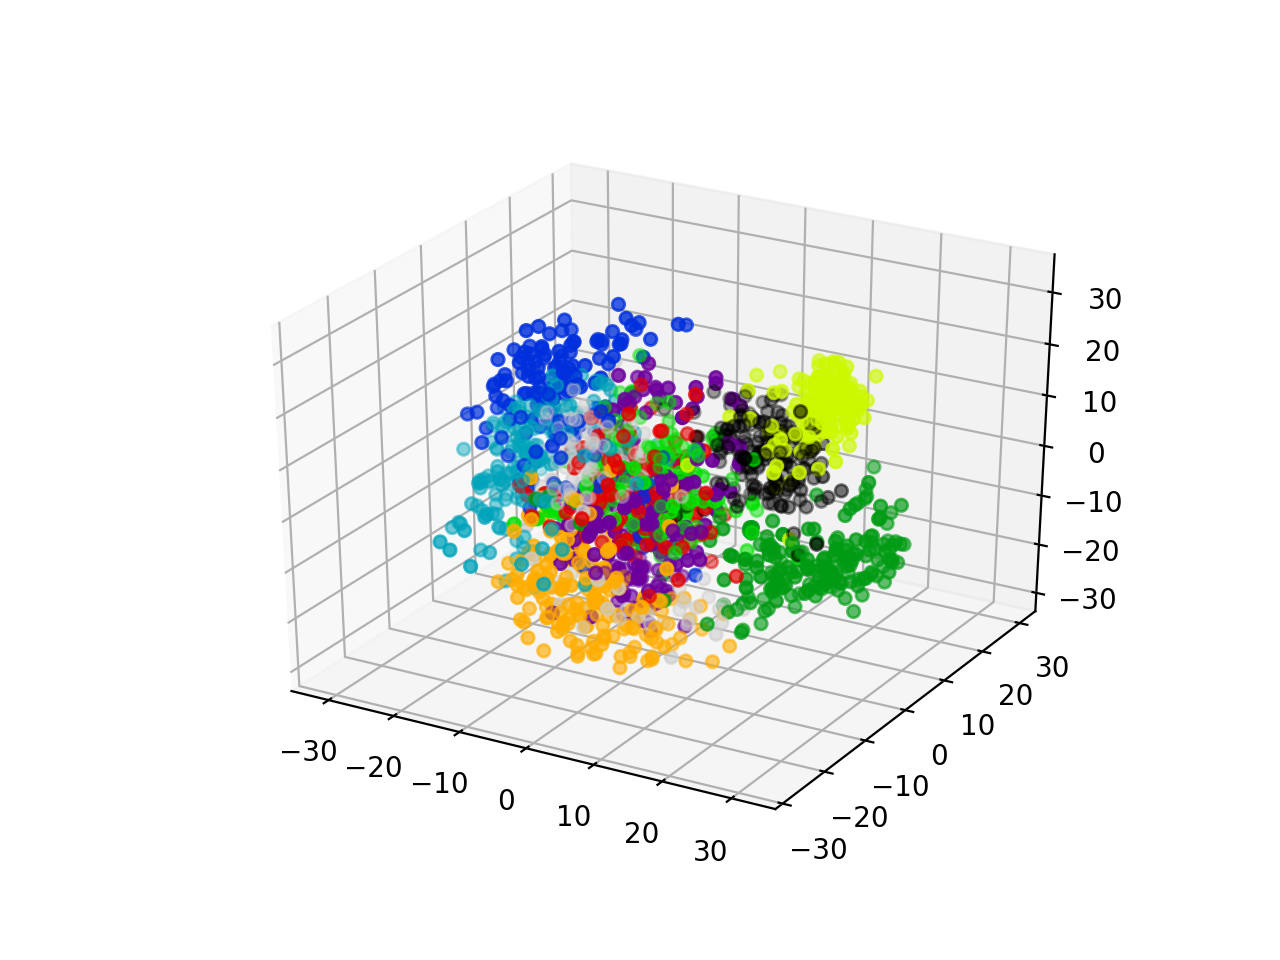

In [1]:
# 三維數據聚類並繪圖
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
import numpy as np
# import seaborn
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

mnist = datasets.load_digits()
X = mnist.data
y = mnist.target
pca = decomposition.PCA(n_components=3)
new_X = pca.fit_transform(X)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(new_X[:, 0], new_X[:, 1], new_X[:, 2], c=y, cmap=plt.cm.spectral)
plt.show()

## 三、實現總結
1. 算法優點: 可以不用知道其具體類別和類別數,並且可以快速的分開並觀察.以做下一步計算.
2. 算法缺點: 結果和K的多少和其初始化位置有一定的關係,所以需要多次計算和驗證才能確定.
3. 安啦安啦,為了省事,直接調用函數計算的.[賣個萌]

#### 完成時間：2017年11月16日，完成人：土豆豆
